<a href="https://colab.research.google.com/github/rgarudkar/ML-PROJECTS/blob/main/STOCKPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from prophet import Prophet #Library for implementation of time series forecasting (created by facebook)
df = pd.read_csv("/content/RELIANCE.NS.csv")
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-25,2034.949951,2034.949951,1932.0,1941.000000,1934.776001,25016570
1,2021-01-27,1925.000000,1925.000000,1888.0,1895.000000,1888.923462,19553809
2,2021-01-28,1880.150024,1923.300049,1870.0,1876.550049,1870.532715,15722291
3,2021-01-29,1894.300049,1913.099976,1830.0,1841.949951,1836.043579,20173258
4,2021-02-01,1859.400024,1905.000000,1848.0,1895.300049,1889.222534,15774504


In [13]:
#date column should either be categorical type or a data type. In our case, the date column is a categorical data type, so we need to change it to DateTime.
df.loc[:, 'Date'] = pd.to_datetime(df.loc[:,'Date'], format="%Y/%m/%d")



**Data Visualization*

Now, let’s plot our data to see what we need to create a model for:

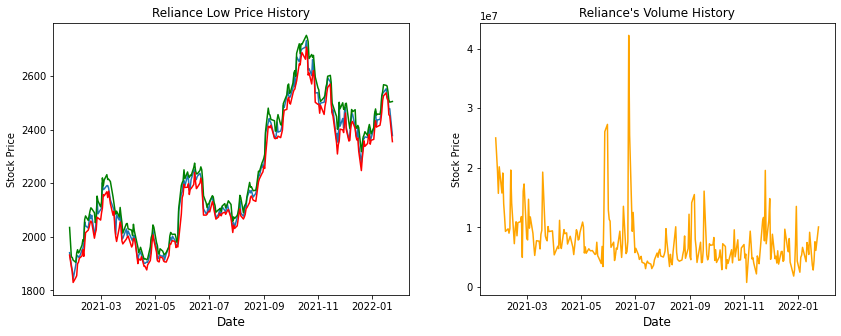

In [4]:
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(df["Date"], df["Close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Reliance Close Price History")

# Second Subplot
ax1.plot(df["Date"],df["High"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Reliance High Price History")

# Third Subplot
ax1.plot(df["Date"], df["Low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Reliance Low Price History")

# Fourth Subplot
ax2.plot(df["Date"], df["Volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Reliance's Volume History")
plt.show()

Steps to use the Prophet Library:

1.Be sure to substitute the close price for y and the date for ds.
2.Fit this data frame to the Prophet to detect future patterns.
3.Predict the prices above and below the closing price.

In [5]:
m = Prophet()

# Drop the columns
ph_df = df.drop(['Open', 'High', 'Low','Volume','Adj Close'], axis=1)
ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
0,2021-01-25,1941.000000
1,2021-01-27,1895.000000
2,2021-01-28,1876.550049
3,2021-01-29,1841.949951
4,2021-02-01,1895.300049


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



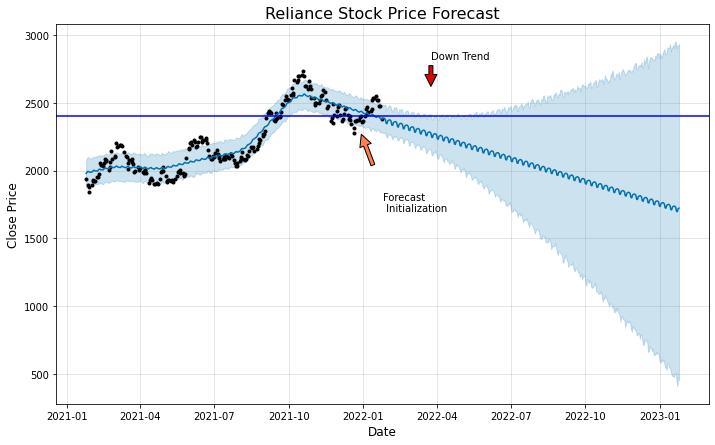

In [16]:
m = Prophet()

# Drop the columns
ph_df = df.drop(['Open', 'High', 'Low','Volume','Adj Close'], axis=1)
ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

ph_df.head()
m = Prophet()
m.fit(ph_df)
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)

import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2022, 1, 25)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2022, 3, 25)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2021, 12, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Reliance Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 2450), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.3),
            )

# Trend emphasis arrow
ax1.annotate('Down Trend', xy=(trend_date1, 2600), xytext=(trend_date1,2825),
            arrowprops=dict(facecolor='#db0707', shrink=0.1),
            )

ax1.axhline(y=2400, color='b', linestyle='-')

plt.show()

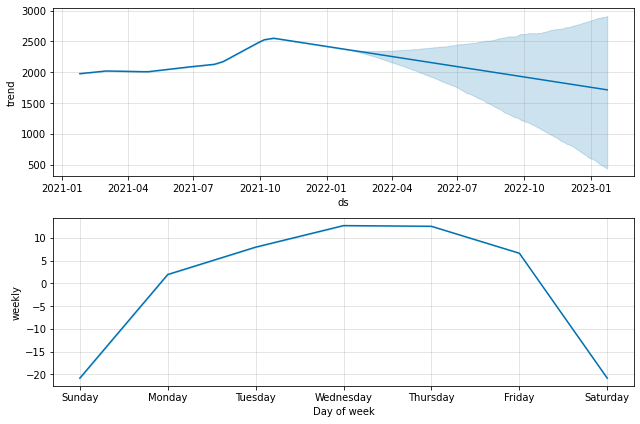

In [26]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


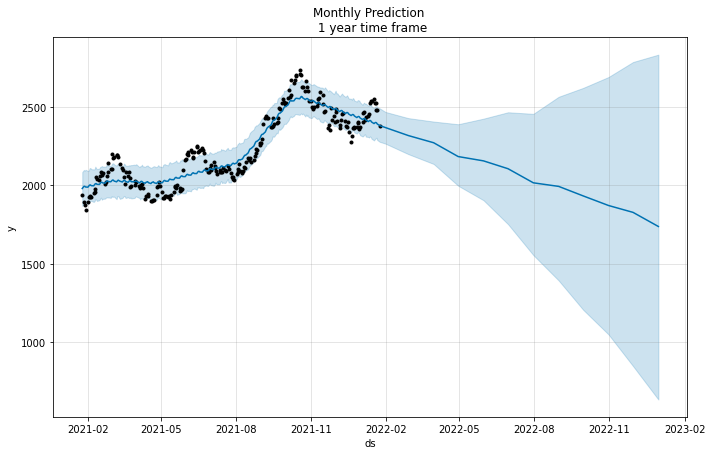

In [25]:
#If the trend changes are being overfit or underfit ,you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale.
#Increasing it will make the trend more flexible
m = Prophet(changepoint_prior_scale=0.05).fit(ph_df) 
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

**Observations:**
From the visualizations above, we can observe that:

1.Reliance’s stock price is showing signs of an uptrend from 2021-02 to 2021-10 then it gradually started showing downtrend.

2.There is no weekly trend for stock prices.

3.Looks like Reliance Stock price is going to fall gradually.